In [1]:
import numpy as np
from numpy.random import normal
from scipy.constants import G
from matplotlib import pyplot as plt
from matplotlib import animation
from enum import Enum
from IPython.display import clear_output

# Set initial conditions

In [2]:
N      = 3                  # number of bodies
Time   = .5e+3              # length of time to be calculated
dt     = 1e-2               # length of one timestep in seconds
nsteps = int(Time/dt)       # discretization of time
EPS    = 1e-3               # softening parameter to avoid singularities when r2-r1=0

r = np.zeros([N,nsteps,3])  # position array
v = np.zeros([N,nsteps,3])  # velocity array
f = np.zeros([N,nsteps,3])  # force array
a = np.zeros([N,nsteps,3])  # acceleration array
m = np.ones(N)              # mass array

# ==================
# Initial conditions    
# ==================
size   = .3e-0            # initial size of the box that frames the position
v0_max = 1e-3
m_all  = 1e+3
m      = m_all*m

# BODY 0
r[0][0][0] = 0.04560677906771746
r[0][0][1] = -0.010447214141804995
r[0][0][2] = 0.0
v[0][0][0] = 0.00021037498322122323
v[0][0][1] = 0.00042589630891071606
v[0][0][2] = 0.0
# BODY 1
r[1][0][0] = -0.06430803939366223
r[1][0][1] = -0.04961162041220647
r[1][0][2] = 0.0
v[1][0][0] = 4.330072837055497e-05
v[1][0][1] = 4.980257351787148e-05
v[1][0][2] = 0.0
# BODY 2
r[2][0][0] = -0.007974020697223638
r[2][0][1] = -0.12191953154496123
r[2][0][2] = 0.0
v[2][0][0] = 0.00033100843164763207
v[2][0][1] = 0.0003563859229114122
v[2][0][2] = 0.0

In [3]:
print('Time =', Time, 's')
print('dt =', dt, 's')
print('total steps =', nsteps)
print('softening parameter =', EPS)
print('number of bodies =', N)
print('masses =', m)

Time = 500.0 s
dt = 0.01 s
total steps = 50000
softening parameter = 0.001
number of bodies = 3
masses = [1000. 1000. 1000.]


# Calculation
Calculating the position at every point in time

In [4]:
def grav_force(m1, m2, r1, r2):
    return (G*m1*m2) * (r2-r1) / (np.linalg.norm(r2-r1)**3 + EPS**2)

for t_i in range(nsteps):
    if t_i % 1e+4 == 0:
        print('current timestep =', t_i)
    for i in range(len(r)):
        for body_k in range(len(r)):
            if body_k != i:
                tmp = grav_force(m[i],m[body_k],r[i][t_i],r[body_k][t_i])
                f[i][t_i] += tmp
        a[i][t_i] = f[i][t_i] / m[i]
        if t_i < (nsteps-1):
            v[i][t_i+1] = v[i][t_i] + a[i][t_i] * dt
            r[i][t_i+1] = r[i][t_i] + v[i][t_i] * dt + 1/2 * a[i][t_i] * dt**2

# x = np.zeros([N,nsteps])
# y = np.zeros([N,nsteps])
# z = np.zeros([N,nsteps])
# for body_i in range(N):
#     x[body_i] = r[body_i,:,0]
#     y[body_i] = r[body_i,:,1]
#     z[body_i] = r[body_i,:,2]

# defining x- and y-values for the 3 different bodies
x = []
y = []
z = []
for i in range(N):
    x.append(r[i,:,0])
    y.append(r[i,:,1])
    z.append(r[i,:,2])

current timestep = 0
current timestep = 10000
current timestep = 20000
current timestep = 30000
current timestep = 40000


# Plot paths

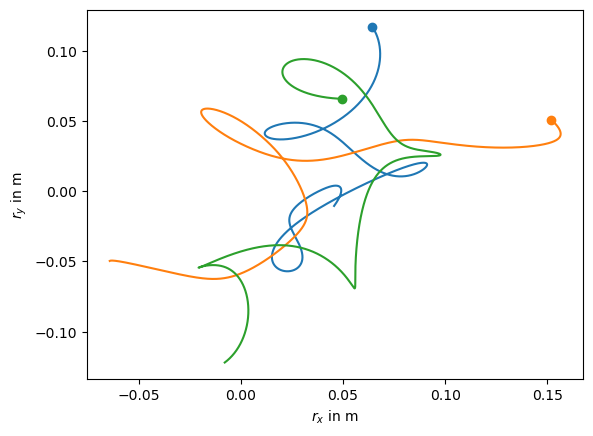

In [5]:
plt.figure()
for i in range(N):
    p = plt.plot(x[i], y[i])
    plt.plot(x[i][nsteps-1], y[i][nsteps-1], 'o', color=p[0].get_color())
    # plt.plot(x[i, nsteps-1], y[i, nsteps-1], 'o', color=p[0].get_color())
plt.xlabel('$r_x$ in m')
plt.ylabel('$r_y$ in m')
plt.show()

# Create and save animation as gif

In [13]:
xmax = 0.2
xmin = -0.1
ymax = 0.15
ymin = -0.15

fig = plt.figure()
ax = plt.axes(
    xlim=(xmin,xmax),
    ylim=(ymin,ymax)
    )
line1, line2, line3 = ax.plot(
    [], [], [], [], [], [], lw=1
    )

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3

def animate(t_i):
    line1.set_data(x[0][0:t_i], y[0][0:t_i])
    line2.set_data(x[1][0:t_i], y[1][0:t_i])
    line3.set_data(x[2][0:t_i], y[2][0:t_i])
    return line1, line2, line3

#dt_plot = 500
dt_plot = 200

anim = animation.FuncAnimation(
    fig, func=animate, init_func=init,
    frames=range(0, nsteps, dt_plot),
    interval=30, blit=True, repeat=True
    )

plt.close()

# Save animation as .gif

In [15]:

# anim.save(
#     'basic_animation.gif', fps=30, extra_args=['-vcodec', 'libx264']
#     )
anim.save('basic_animation.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
